<h1> Importations of Libraries </h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf

import random

# import clear_output
import os
import seaborn as sns

<h1> Data Preprocessing

In [2]:
stock_returns = pd.read_csv("../Data/StockReturns.csv")

esg_scores = np.array([
    36.6, 17.9, 18, 
    18, 23.2, 29.2, 
    15.7, 25.4, 25.6, # Del this
    19.8, 13.8, 18.1, 
    17.3, 14, 12.3, 
    21.2, 26.8, 24.9
])

# Defining stock pool
ticker_df =  pd.DataFrame({
    "Petroleum": ["EQNR.OL", "SUBC.OL", "BWO.OL"],
    "Food": ["ORK.OL", "MOWI.OL", "LSG.OL"],
    "Materials": ["NHY.OL", "YAR.OL", "RECSI.OL"],
    "Technologies": ["TEL.OL", "NOD.OL", "ATEA.OL"],
    "Financial": ["STB.OL", "DNB.OL", "AKER.OL"],
    "Shipping":["SNI.OL", "BELCO.OL", "ODF.OL"]
})

stock_cols = stock_returns.columns

train = stock_returns.iloc[:int(len(stock_returns)*0.9)]
valid = stock_returns.iloc[int(len(stock_returns)*0.9):int(len(stock_returns)*0.95)]
test = stock_returns.iloc[int(len(stock_returns)*0.95):]

In [ ]:
new_df =  pd.DataFrame(columns=stock_cols)
mean_list = []
std_list = []
for col in stock_cols:
    mean_list.append(train[col].mean())
    std_list.append(train[col].std())

new_df =  pd.DataFrame(columns=stock_cols)
new_dft = new_df.T
new_dft["Mean"] = mean_list
new_dft["Std"] = std_list
new_dft["ESG"] = esg_scores

In [12]:
mean_list = []
std_list = []
for col in stock_cols:
    mean_list.append(valid[col].mean())
    std_list.append(valid[col].std())

new_df2 =  pd.DataFrame(columns=stock_cols)
new_dft2 = new_df2.T
new_dft2["Mean"] = mean_list
new_dft2["Std"] = std_list
new_dft2["ESG"] = esg_scores

<h1> Line Plots by Sectors <h1>

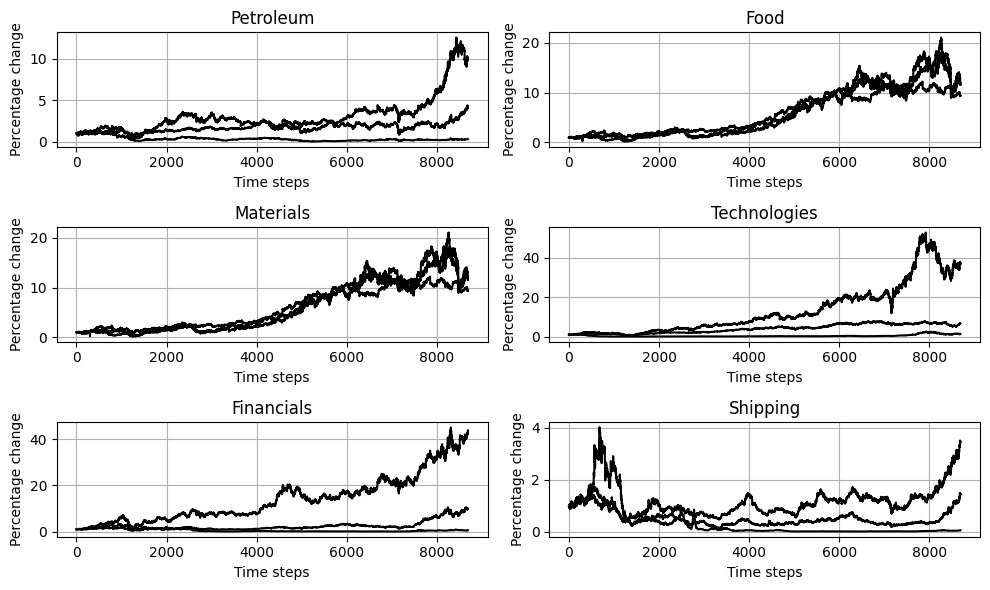

In [4]:
def z_score(arr):
    answer = (arr-arr.mean()) / arr.std()
    return answer

sector_names = [["Petroleum", "Food"],["Materials", "Technologies"], ["Financials", "Shipping"]]
fig, ax = plt.subplots(3,2, figsize=(10,6))
for i in range(0,3,1):
    ax[i,0].plot((np.cumprod(train.iloc[:, i*3:(i+1)*3]+1)), color="black", alpha=1)
    ax[i,1].plot((np.cumprod(train.iloc[:, 3+i*6 : (i+1)*6]+1)), color="black", alpha=1)

    ax[i,0].set_title(sector_names[i][0])
    ax[i,1].set_title(sector_names[i][1])

    ax[i,0].set_xlabel("Time steps")
    ax[i,1].set_xlabel("Time steps")

    ax[i,0].set_ylabel("Percentage change")    
    ax[i,1].set_ylabel("Percentage change")
    
    ax[i,0].grid()
    ax[i,1].grid()
fig.tight_layout()


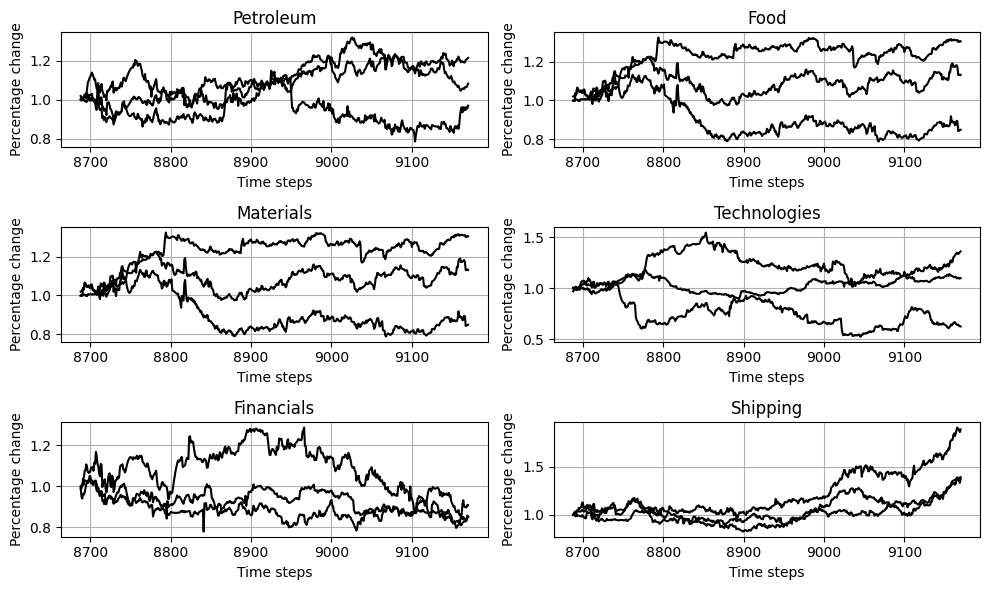

In [5]:
def z_score(arr):
    answer = (arr-arr.mean()) / arr.std()
    return answer

sector_names = [["Petroleum", "Food"],["Materials", "Technologies"], ["Financials", "Shipping"]]
fig, ax = plt.subplots(3,2, figsize=(10,6))
for i in range(0,3,1):
    ax[i,0].plot((np.cumprod(valid.iloc[:, i*3:(i+1)*3]+1)), color="black", alpha=1)
    ax[i,1].plot((np.cumprod(valid.iloc[:, 3+i*6 : (i+1)*6]+1)), color="black", alpha=1)

    ax[i,0].set_title(sector_names[i][0])
    ax[i,1].set_title(sector_names[i][1])

    ax[i,0].set_xlabel("Time steps")
    ax[i,1].set_xlabel("Time steps")

    ax[i,0].set_ylabel("Percentage change")    
    ax[i,1].set_ylabel("Percentage change")
    
    ax[i,0].grid()
    ax[i,1].grid()
fig.tight_layout()


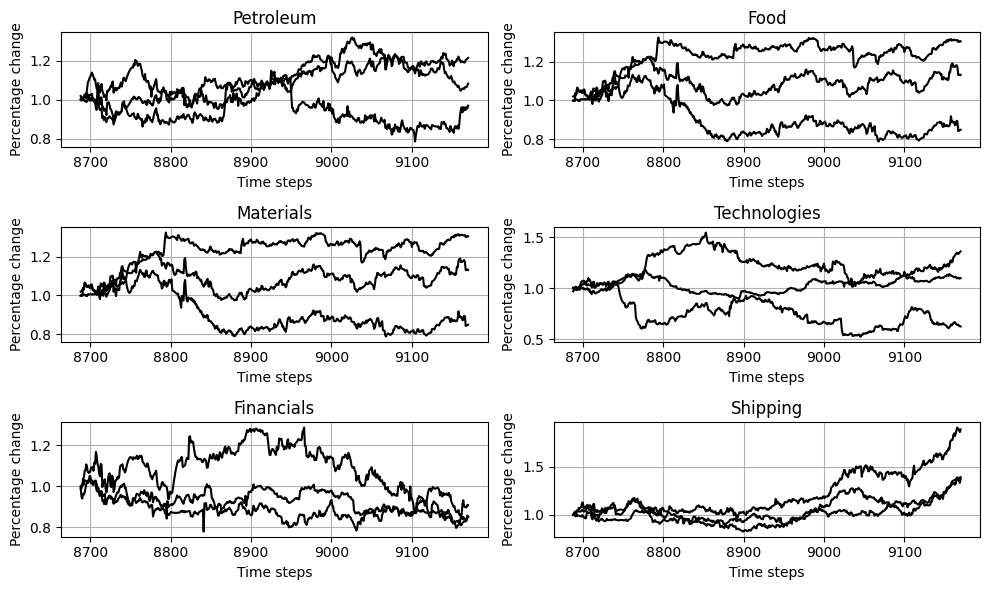

In [6]:
def z_score(arr):
    answer = (arr-arr.mean()) / arr.std()
    return answer

sector_names = [["Petroleum", "Food"],["Materials", "Technologies"], ["Financials", "Shipping"]]
fig, ax = plt.subplots(3,2, figsize=(10,6))
for i in range(0,3,1):
    ax[i,0].plot((np.cumprod(valid.iloc[:, i*3:(i+1)*3]+1)), color="black", alpha=1)
    ax[i,1].plot((np.cumprod(valid.iloc[:, 3+i*6 : (i+1)*6]+1)), color="black", alpha=1)

    ax[i,0].set_title(sector_names[i][0])
    ax[i,1].set_title(sector_names[i][1])

    ax[i,0].set_xlabel("Time steps")
    ax[i,1].set_xlabel("Time steps")

    ax[i,0].set_ylabel("Percentage change")    
    ax[i,1].set_ylabel("Percentage change")
    
    ax[i,0].grid()
    ax[i,1].grid()
fig.tight_layout()


<h1> Correlation Scatter Plots </h1>

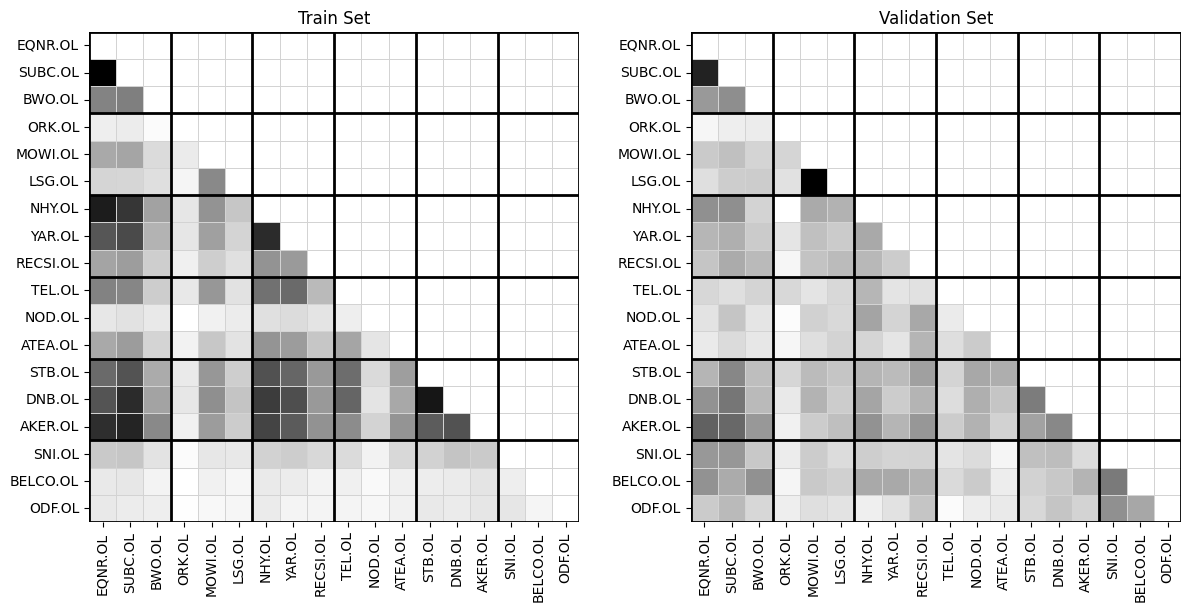

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create the figure and 3 horizontal subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)

datasets = [train, valid]
titles = ['Train Set', 'Validation Set']

for i, (ax, data, title) in enumerate(zip(axes, datasets, titles)):
    # Create upper triangle mask
    mask = np.triu(np.ones_like(data.corr(), dtype=bool))
    
    # Plot heatmap
    sns.heatmap(data.corr(),
                mask=mask,
                cmap="Greys",
                cbar=(i==2),
                ax=ax,
                square=True,
                linewidths=0.5,
                linecolor='lightgray')

    # Grid lines every 3 rows/cols
    for i in range(0, data.shape[0] + 1,3):
        ax.axhline(i, color='black', linewidth=2)
        ax.axvline(i, color='black', linewidth=2)
    
    ax.set_title(title)

plt.show()


In [8]:
# mask = np.triu(np.ones_like(train.corr(), dtype=bool))
# sns.heatmap(train.corr(),
#             mask=mask,
#             cmap="Greys")
# for i in range(0, 19, 3):
#     plt.axhline(i, color='black', linewidth=2)  # Horizontal line
# for j in range(0, 19, 3):
#     plt.axvline(j, color='black', linewidth=2)  # Vertical line

# plt.show()

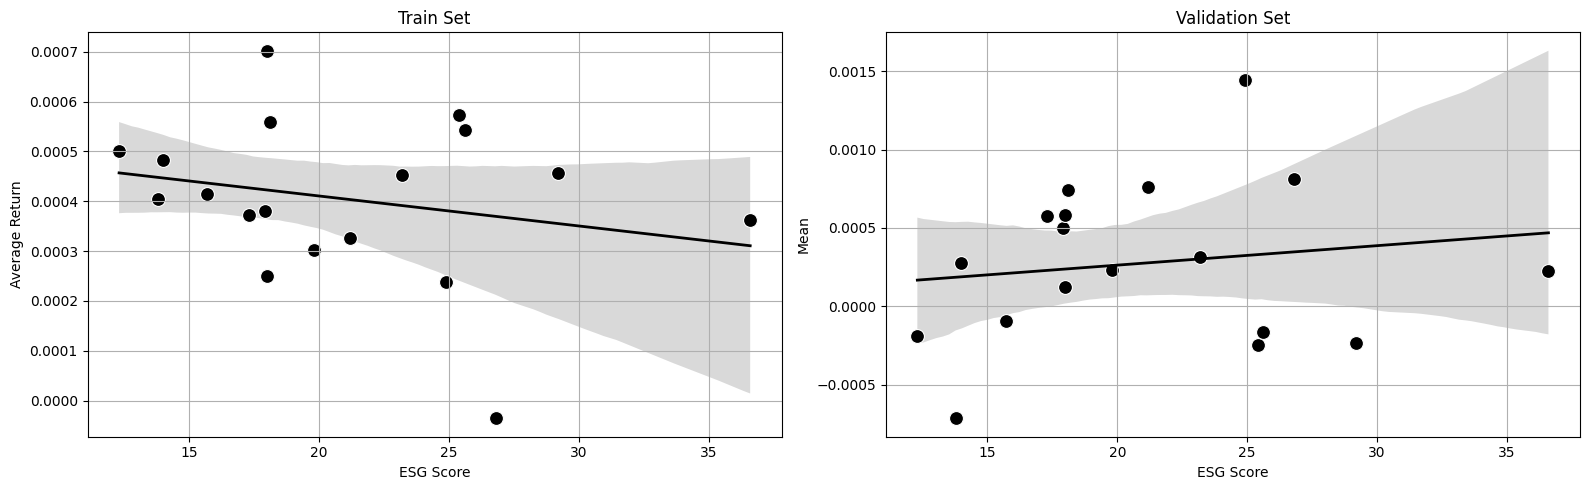

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5))  # 1 row, 2 columns

# First plot
sns.regplot(x='ESG', y='Mean', data=new_dft, ax=axes[0], scatter_kws={'color': 'b'}, line_kws={'color': 'black', 'linewidth': 2})
sns.scatterplot(x='ESG', y='Mean', data=new_dft, ax=axes[0], s=100, color='black')
axes[0].set_xlabel("ESG Score")
axes[0].set_ylabel("Average Return")
axes[0].grid(True)
axes[0].set_title("Train Set")

# Second plot (replace `new_dft2` with your second DataFrame)
sns.regplot(x='ESG', y='Mean', data=new_dft2, ax=axes[1], scatter_kws={'color': 'b'}, line_kws={'color': 'black', 'linewidth': 2})
sns.scatterplot(x='ESG', y='Mean', data=new_dft2, ax=axes[1], s=100, color='black')
axes[1].set_xlabel("ESG Score")
axes[1].grid(True)
axes[1].set_title("Validation Set")

# Adjust layout and show plot
plt.tight_layout()
plt.show()


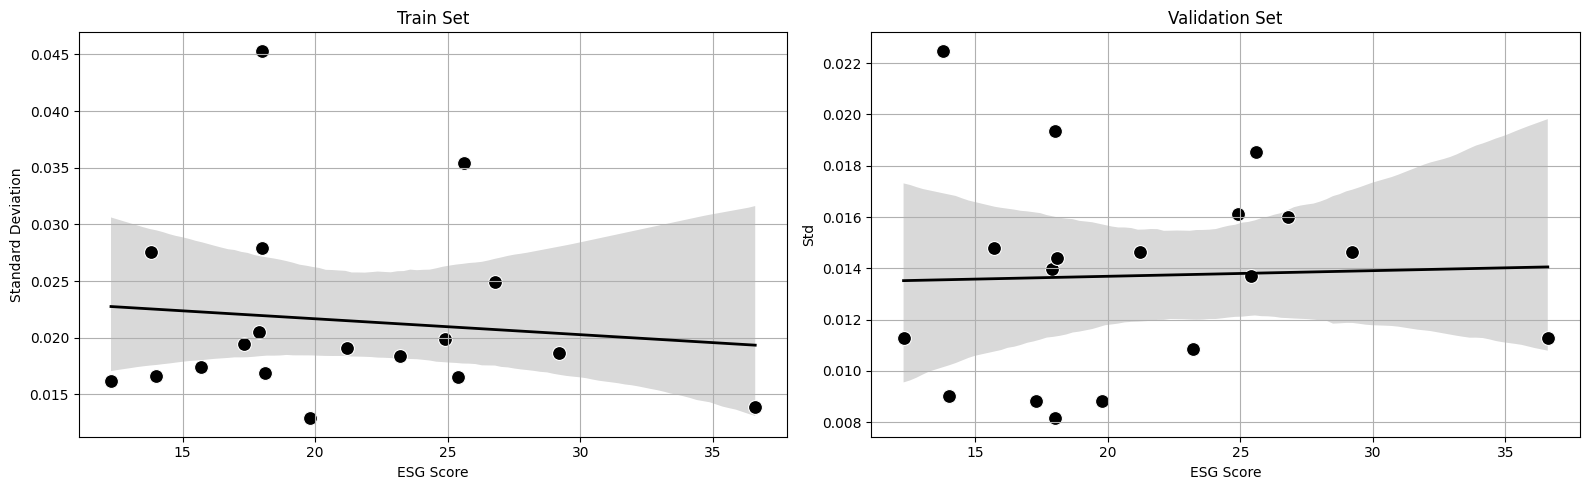

In [18]:
# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5))  # 1 row, 2 columns

# First plot (Dataset 1)
sns.regplot(x='ESG', y='Std', data=new_dft, ax=axes[0], scatter_kws={'color': 'b'}, line_kws={'color': 'black', 'linewidth': 2})
sns.scatterplot(x='ESG', y='Std', data=new_dft, ax=axes[0], s=100, color='black')
axes[0].set_xlabel("ESG Score")
axes[0].set_ylabel("Standard Deviation")
axes[0].grid(True)
axes[0].set_title("Train Set")

# Second plot (Dataset 2)
sns.regplot(x='ESG', y='Std', data=new_dft2, ax=axes[1], scatter_kws={'color': 'b'}, line_kws={'color': 'black', 'linewidth': 2})
sns.scatterplot(x='ESG', y='Std', data=new_dft2, ax=axes[1], s=100, color='black')
axes[1].set_xlabel("ESG Score")
# axes[1].set_ylabel("Standard Deviation")
axes[1].grid(True)
axes[1].set_title("Validation Set")

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [16]:
# # Scatter plot of ESG Score vs Average Return
# plt.figure(figsize=(8, 5))
# sns.regplot(x='ESG', y='Std', data=new_dft, scatter_kws={'color': 'b'}, line_kws={'color': 'black', 'linewidth': 2})
# sns.scatterplot(x='ESG', y='Std', data=new_dft, s=100, color='black')

# # Labels and title
# plt.xlabel("ESG Score")
# plt.ylabel("Standard Deviation")
# plt.grid(True)

# # Show plot
# plt.show()
